Processing of Both Files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV files
Temp='1400'
data1 = np.loadtxt('Results/CANTERA_BFER_species_molar_fractions'+Temp+'.csv', delimiter=',', skiprows=1)
data2 = np.loadtxt('D:/2_Cantera/Python_files/0D/Alborz_Results/Alborz_Results_'+Temp+'/debug/species_mole_fractions.dat')
# Extract the data columns
time1 = data1[:, 1]  # Assuming time is in the first column of data1.csv
temperature1 = data1[:, 2]  # Assuming temperature is in the second column of data1.csv
species_data1 = data1[:, 3:]

time2 = data2[:, 1]  # Assuming time is in the first column of data2.csv
temperature2 = data2[:, 2]
species_data2 = data2[:, 3:]  # Assuming species data starts from the second column in data2.csv

min_temp_cantera = min(temperature1)
min_temp_alborz = min(temperature2)
max_temp_cantera = max(temperature1)
max_temp_alborz = max(temperature2)

O2_cantera =    (species_data1[-1, 0])
O2_alborz =     (species_data2[-1, 0])
H2O_cantera =   (species_data1[-1, 1])
H2O_alborz =    (species_data2[-1, 1])
CH4_cantera =   (species_data1[-1, 2])
CH4_alborz =    (species_data2[-1, 2])
CO_cantera =    (species_data1[-1, 3])
CO_alborz =     (species_data2[-1, 3])
CO2_cantera =   (species_data1[-1, 4])
CO2_alborz =    (species_data2[-1, 4])
N2_cantera =    (species_data1[-1, 5])
N2_alborz =     (species_data2[-1, 5])

print(f"The min temperature is: Cantera:{min_temp_cantera}K; Alborz:{min_temp_alborz:.2e}K")
print(f"The maximum temperature is: Cantera:{max_temp_cantera:.3f}K; Alborz:{max_temp_alborz:.3f}K")
print(f"The min O2: Cantera:{O2_cantera:.2e}; Alborz:{O2_alborz:.2e}")
print(f"The min CH4: Cantera:{CH4_cantera:.2e}; Alborz:{CH4_alborz:.2e}")

# Calculate heat release at each time step
heat_release = np.diff(data2[:, 2]) / np.diff(data2[:, 1])

# Find the index of maximum heat release
max_heat_release_idx = np.argmax(heat_release)
max_heat_release_time = data2[:, 1][max_heat_release_idx]

# Print the results
print(f"Physical time at maximum heat release: {max_heat_release_time} seconds")

The min temperature is: Cantera:1400.273353596345K; Alborz:1.40e+03K
The maximum temperature is: Cantera:2888.083K; Alborz:2888.417K
The min O2: Cantera:2.64e-02; Alborz:2.64e-02
The min CH4: Cantera:-3.24e-14; Alborz:0.00e+00
Physical time at maximum heat release: 3.143999999999978e-05 seconds


Combined Plots!

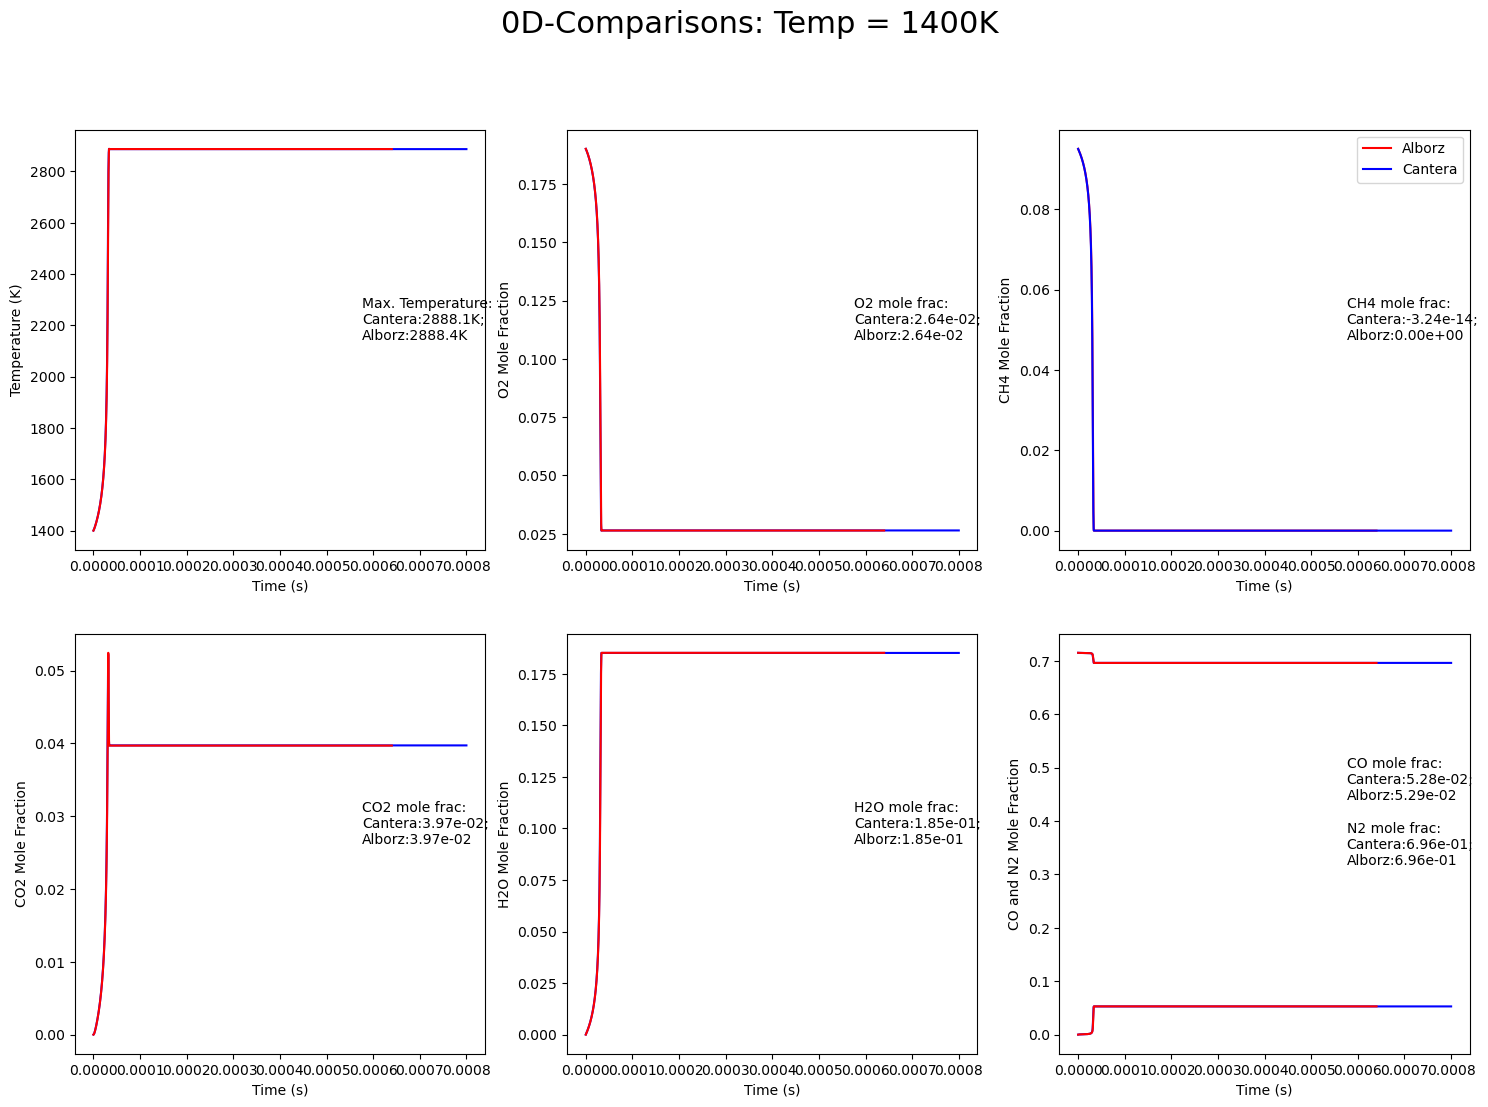

In [4]:
#ALBORZ_DATA
#   columns         0           1       2          3    4       5   6       7   8
# species_order = [Iteration, Time, Temperature, 'O2', 'H2O','CH4','CO', 'CO2', 'N2']

#Cantera_Data
#   columns         0          1           2      3/0  4/1   5/2  6/3  7/4 8/5
# species_order = Iteration,Time (s),Temperature, O2,  H2O,  CH4, CO,  CO2,  N2

# Plotting
fig_total = plt.figure(figsize=(18, 12))
plt.clf()

ax1 = plt.subplot(2, 3, 1)
plt.plot(time1, temperature1, 'b-')
plt.plot(time2, temperature2, 'r-')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
text = f'Max. Temperature:\nCantera:{max_temp_cantera:.1f}K;\nAlborz:{max_temp_alborz:.1f}K'
plt.text(0.7, 0.5, text, transform=ax1.transAxes)

ax2 = plt.subplot(2, 3, 2)
plt.plot(time1, species_data1[:, 0], 'b-')
plt.plot(time2, species_data2[:, 0], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('O2 Mole Fraction')
text = f'O2 mole frac:\nCantera:{O2_cantera:.2e};\nAlborz:{O2_alborz:.2e}'
plt.text(0.7, 0.5, text, transform=ax2.transAxes)

ax3 = plt.subplot(2, 3, 3)
plt.plot(time2, species_data2[:, 2], 'r-')
plt.plot(time1, species_data1[:, 2], 'b-')
plt.xlabel('Time (s)')
plt.ylabel('CH4 Mole Fraction')
plt.legend(loc='upper right', labels=['Alborz','Cantera'])
text = f'CH4 mole frac:\nCantera:{CH4_cantera:.2e};\nAlborz:{CH4_alborz:.2e}'
plt.text(0.7, 0.5, text, transform=ax3.transAxes)

ax4 = plt.subplot(2, 3, 4)
plt.plot(time1, species_data1[:, 4], 'b-')
plt.plot(time2, species_data2[:, 4], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('CO2 Mole Fraction')
text = f'CO2 mole frac:\nCantera:{CO2_cantera:.2e};\nAlborz:{CO2_alborz:.2e}'
plt.text(0.7, 0.5, text, transform=ax4.transAxes)

ax5 = plt.subplot(2, 3, 5)
plt.plot(time1, species_data1[:, 1], 'b-')
plt.plot(time2, species_data2[:, 1], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('H2O Mole Fraction')
text = f'H2O mole frac:\nCantera:{H2O_cantera:.2e};\nAlborz:{H2O_alborz:.2e}'
plt.text(0.7, 0.5, text, transform=ax5.transAxes)

ax6 = plt.subplot(2, 3, 6)
plt.plot(time1, species_data1[:, 3], 'b-')
plt.plot(time2, species_data2[:, 3], 'r-')
plt.plot(time1, species_data1[:, 5], 'b-')
plt.plot(time2, species_data2[:, 5], 'r-')
plt.xlabel('Time (s)')
plt.ylabel('CO and N2 Mole Fraction')
text = f'CO mole frac:\nCantera:{CO_cantera:.2e};\nAlborz:{CO_alborz:.2e}\n\nN2 mole frac:\nCantera:{N2_cantera:.2e};\nAlborz:{N2_alborz:.2e}'
plt.text(0.7, 0.45, text, transform=ax6.transAxes)

# Save or display the entire Figure
#plt.tight_layout()
fig_total.suptitle('0D-Comparisons: Temp = ' + Temp +'K', fontsize=22)
plt.savefig('Results/0D-BFER Comparison_' + Temp + '.png', dpi=300)
plt.show()

Autoignition_combined

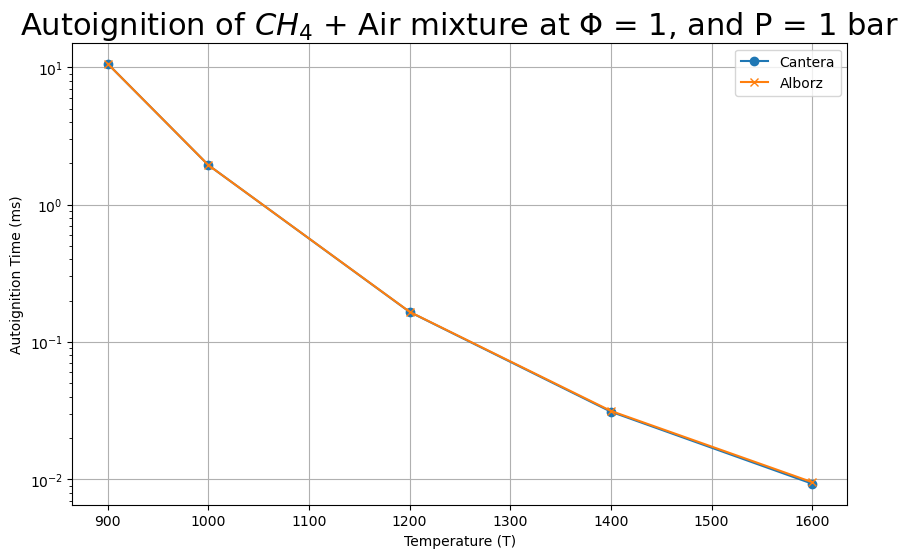

In [9]:
#CANTERA
# Given data for the first table
#For T = 900.0, Autoignition time = 0.010620880000000762 s 200000
#For T = 1000.0, Autoignition time = 0.0019407999999993054 s 50000
#For T = 1200.0, Autoignition time = 0.00016536000000000583 s
#For T = 1400.0, Autoignition time = 3.1039999999999784e-05 s 10000
#For T = 1600.0, Autoignition time =9.27999999999999e-06 s 10000 iterations

#ALBORZ
#900: Cantera:2591.757K; Alborz:2591.867K
#Physical time at maximum heat release: 0.010621600000000758 seconds
#1000: The maximum temperature is: Cantera:2648.953K; Alborz:2649.098K
#Physical time at maximum heat release: 0.001941359999999305 seconds
#1200: The maximum temperature is: Cantera:2765.964K; Alborz:2766.181K
#Physical time at maximum heat release: 0.0001657600000000059 seconds
#1400: The maximum temperature is: Cantera:2888.083K; Alborz:2888.417K
#Physical time at maximum heat release: 3.143999999999978e-05 seconds
#1600: The maximum temperature is: Cantera:3017.876K; Alborz:3018.447K
#Physical time at maximum heat release: 9.519999999999988e-06 seconds

#CANTERA
data_1 = {
    900: 0.010620880000000762,
    1000: 0.0019407999999993054,
    1200: 0.00016536000000000583 ,
    1400: 3.1039999999999784e-05,
    1600: 9.27999999999999e-06
}

#ALBORZ
data_2 = {
    900: 0.010621600000000758,
    1000: 0.001941359999999305,
    1200: 0.0001657600000000059,
    1400: 3.143999999999978e-05,
    1600: 9.519999999999988e-06
}

# Extract temperatures and autoignition times from the dictionaries
temperatures = list(data_1.keys())
autoignition_times_1 = [time * 1000 for time in data_1.values()]# Convert to milliseconds
autoignition_times_2 = [time * 1000 for time in data_2.values()]  # Convert to milliseconds
plt.figure(figsize=(10, 6))
plt.plot(temperatures, autoignition_times_1, marker='o', label='Table 1')
plt.plot(temperatures, autoignition_times_2, marker='x', label='Table 2')
plt.xlabel('Temperature (T)')
plt.ylabel('Autoignition Time (ms)')
plt.yscale('log')
plt.title(r'Autoignition of $CH_{4}$ + Air mixture at $\Phi$ = 1, and P = 1 bar',
fontsize=22, horizontalalignment='center')
plt.axis()
plt.grid()
plt.legend(loc='upper right', labels=['Cantera','Alborz'])
plt.savefig('Results/0D-BFER_Autoignition.png', dpi=300)
plt.show()

Maximum Temperature_combined

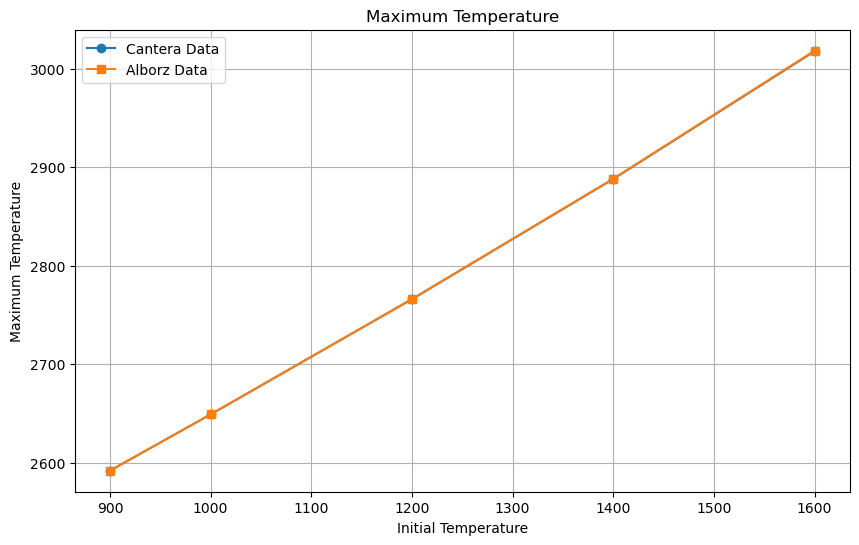

In [10]:
#900:  Cantera:2591.757K; Alborz:2591.867K
#1000: Cantera:2648.953K; Alborz:2649.098K
#1200: Cantera:2765.964K; Alborz:2766.181K
#1400: Cantera:2888.083K; Alborz:2888.417K
#1600: Cantera:3017.876K; Alborz:3018.447K

# Simulated temperature data for Python and Alborz
np.random.seed(0)
num_simulations = 5

Cantera_Temperature = {
    900:  2591.757,
    1000: 2648.953,
    1200: 2765.964,
    1400: 2888.083,
    1600: 3017.876
}

Alborz_Temperature = {
    900:  2591.867,
    1000: 2649.098,
    1200: 2766.181,
    1400: 2888.417,
    1600: 3018.447
}

# Extract x (temperature) and y (value) data from dictionaries
x_python = list(Cantera_Temperature.keys())
y_python = list(Cantera_Temperature.values())

x_alborz = list(Alborz_Temperature.keys())
y_alborz = list(Alborz_Temperature.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_python, y_python, marker='o', label='Cantera Data')
plt.plot(x_alborz, y_alborz, marker='s', label='Alborz Data')
plt.xlabel('Initial Temperature')
plt.ylabel('Maximum Temperature')
plt.title('Maximum Temperature')
plt.legend()
plt.grid(True)
plt.savefig('Results/0D-BFER_Max_Temperature.png', dpi=300)
plt.show()

#plt.text(0.5, 0.5, 'Center', transform = ax.transAxes)
#plt.text(0.05, 0.05, 'Bottom-left', transform = ax.transAxes)
#plt.text(0.8, 0.85, 'Top-right', transform = ax.transAxes)
#plt.text(0.8, 0.05, 'Bottom-right', transform = ax.transAxes)
#plt.text(0.05, 0.85, 'Top-left', transform = ax.transAxes)

[-0.11000000000012733, -0.1449999999999818, -0.21700000000009823, -0.33399999999983265, -0.5709999999999127]
[900, 1000, 1200, 1400, 1600]


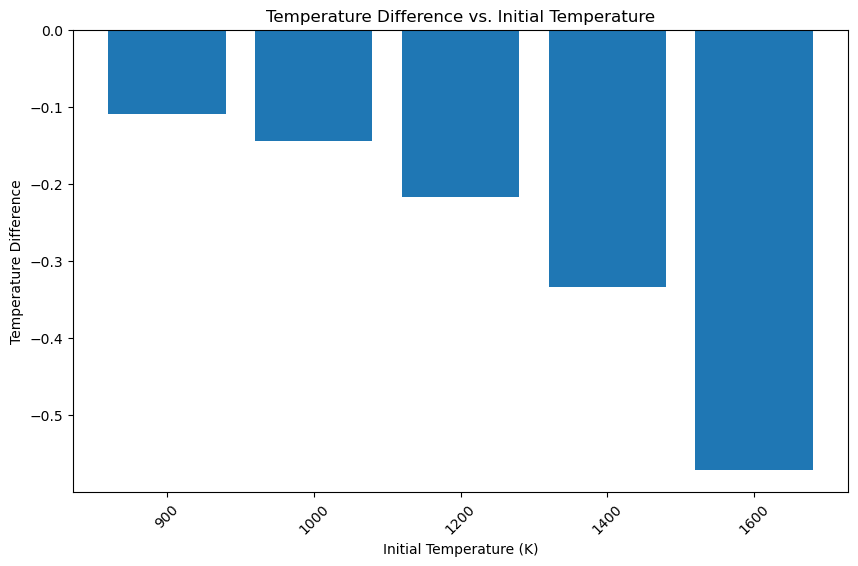

In [11]:
# Assuming y_cantera and y_alborz have the same length
y_diff = [y1 - y2 for y1, y2 in zip(y_python, y_alborz)]
print(y_diff)
print(x_python)

# Assuming x_python and y_diff are defined as you mentioned
plt.figure(figsize=(10, 6))
plt.bar(range(len(x_python)), y_diff, tick_label=x_python)
plt.xlabel('Initial Temperature (K)')
plt.ylabel('Temperature Difference')
plt.title('Temperature Difference vs. Initial Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(False)
plt.savefig('Results/0D-BFER_Temp_Difference.png', dpi=300)
plt.show()

In [12]:
'''#For T = 1400.0, Autoignition time = 2.399999999999985e-05 s

# Define the values
Autoignition_time_Cantera = 2.3999999e-05
Autoignition_time_Alborz = 9.5199999e-06

# Create a bar plot
plt.bar(['Cantera', 'Alborz'], [Autoignition_time_Cantera, Autoignition_time_Alborz], color=['blue', 'red'])
plt.xlabel('Simulation')
plt.ylabel('Autoignition [s]')
#plt.yscale('log')
plt.title(r'Autoignition of $CH_4$ + Air mixture at $\Phi$ = 1, and P = 1 bar', fontsize=22, horizontalalignment='center')
plt.grid()

# Display the plot
plt.show()'''


"#For T = 1400.0, Autoignition time = 2.399999999999985e-05 s\n\n# Define the values\nAutoignition_time_Cantera = 2.3999999e-05\nAutoignition_time_Alborz = 9.5199999e-06\n\n# Create a bar plot\nplt.bar(['Cantera', 'Alborz'], [Autoignition_time_Cantera, Autoignition_time_Alborz], color=['blue', 'red'])\nplt.xlabel('Simulation')\nplt.ylabel('Autoignition [s]')\n#plt.yscale('log')\nplt.title(r'Autoignition of $CH_4$ + Air mixture at $\\Phi$ = 1, and P = 1 bar', fontsize=22, horizontalalignment='center')\nplt.grid()\n\n# Display the plot\nplt.show()"